In [6]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle5 as pickle

# magic word for producing visualizations in notebook
%matplotlib inline

## EDA 

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

## Files

1. `Arvato_EDA.ipynb` EDA with the aim of understading the data at hand.


2. `data_preprocessing.py`: Python module that contains data preprocessing functions to preprocess AZDIAS and CUSTOMERS data for customer segmentation analysis.

Note that data preprocessing steps are identified during EDA.


### 1. First glance at the data

In [7]:
# load in the demographics data for the general population of Germany
azdias = pd.read_csv('../data/Udacity_AZDIAS_052018.csv')

/Users/bernardogarcia/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
azdias.head(5)

,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [9]:
# load in the demographics data for customers of a mail-order company
customers = pd.read_csv('../data/Udacity_CUSTOMERS_052018.csv')

/Users/bernardogarcia/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
customers.head(5)

,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


_____

### 2. Match attributes in .csv files with attributes in attributes spreadsheet

I will manually go through all the attributes checking the data type and distributions.

In [11]:
# loop through all attributes names and print them alphabetically ordered
for index, i in enumerate(customers.columns.sort_values()):
    print(index, "_", i)

0 _ AGER_TYP
1 _ AKT_DAT_KL
2 _ ALTERSKATEGORIE_FEIN
3 _ ALTERSKATEGORIE_GROB
4 _ ALTER_HH
5 _ ALTER_KIND1
6 _ ALTER_KIND2
7 _ ALTER_KIND3
8 _ ALTER_KIND4
9 _ ANREDE_KZ
10 _ ANZ_HAUSHALTE_AKTIV
11 _ ANZ_HH_TITEL
12 _ ANZ_KINDER
13 _ ANZ_PERSONEN
14 _ ANZ_STATISTISCHE_HAUSHALTE
15 _ ANZ_TITEL
16 _ ARBEIT
17 _ BALLRAUM
18 _ CAMEO_DEUG_2015
19 _ CAMEO_DEU_2015
20 _ CAMEO_INTL_2015
21 _ CJT_GESAMTTYP
22 _ CJT_KATALOGNUTZER
23 _ CJT_TYP_1
24 _ CJT_TYP_2
25 _ CJT_TYP_3
26 _ CJT_TYP_4
27 _ CJT_TYP_5
28 _ CJT_TYP_6
29 _ CUSTOMER_GROUP
30 _ D19_BANKEN_ANZ_12
31 _ D19_BANKEN_ANZ_24
32 _ D19_BANKEN_DATUM
33 _ D19_BANKEN_DIREKT
34 _ D19_BANKEN_GROSS
35 _ D19_BANKEN_LOKAL
36 _ D19_BANKEN_OFFLINE_DATUM
37 _ D19_BANKEN_ONLINE_DATUM
38 _ D19_BANKEN_ONLINE_QUOTE_12
39 _ D19_BANKEN_REST
40 _ D19_BEKLEIDUNG_GEH
41 _ D19_BEKLEIDUNG_REST
42 _ D19_BILDUNG
43 _ D19_BIO_OEKO
44 _ D19_BUCH_CD
45 _ D19_DIGIT_SERV
46 _ D19_DROGERIEARTIKEL
47 _ D19_ENERGIE
48 _ D19_FREIZEIT
49 _ D19_GARTEN
50 _ D19_GESAMT_ANZ_12


In [12]:
def get_type(df, variable):
    """It displays the variable type and distribution values.

    :param df: AZDIAS or CUSTOMERS Pandas DataFrame
    :param variable: String. Name of the variable
    :return: None
    """
    print(df[variable].dtype)
    print(df[variable].value_counts().sort_index())

In [13]:
# get variable type and variable distribution
get_type(customers, 'RT_UEBERGROESSE')

float64
0.0     1903
1.0    36913
2.0    45510
3.0    29298
4.0    13459
5.0    20377
Name: RT_UEBERGROESSE, dtype: int64


I spot-checked that some attributes that are in the are in the `Udacity_AZDIAS_052018.csv` and `Udacity_CUSTOMERS_052018.csv` are not in *DIAS Attributes - Values 2017.xlsx* spreadsheet. This is a problem because I cannot know the meaning of these attributes for sure.

Another important finding is that there are unknown values represented by -1, 0, 9 or 10, according to *DIAS Attributes - Values 2017.xlsx*. Some of these unknown values have not been mapped to NaN's. I used get_type( ) function to manually create a .csv file called `attributes.csv` with all the attributes in `Udacity_AZDIAS_052018.csv` and `Udacity_CUSTOMERS_052018.csv`, their variable type and unknown values.

In [14]:
# load in attributes.csv
attributes = pd.read_csv('../data/attributes.csv', sep=';', names=['Type', 'Unknown'])
attributes.head()

,Type,Unknown
AGER_TYP,categorical,"[-1,0]"
AKT_DAT_KL,ordinal,[]
ALTERSKATEGORIE_FEIN,ordinal,[0]
ALTERSKATEGORIE_GROB,ordinal,[0]
ALTER_HH,ordinal,[0]


Note that **Type** tells you the nature of the variable but not its current datatype, as most of them have been already encoded.

_____

### 3. Data types

Columns 19: `CAMEO_DEUG_2015` and 20: `CAMEO_INTL_2015` have mixed datatypes. See warning message when using pd.read_csv.

In [15]:
# CAMEO_DEUG_2015
azdias.iloc[:, 19].value_counts()

8      78023
9      62578
6      61253
4      60185
8.0    56418
3      50360
2      48276
9.0    45599
7      45021
6.0    44621
4.0    43727
3.0    36419
2.0    34955
7.0    32912
5      32292
5.0    23018
1      20997
1.0    15215
X        373
Name: CAMEO_DEUG_2015, dtype: int64

In [16]:
customers.iloc[:, 19].value_counts()

2      17574
4      16458
6      14008
3      13585
1      12498
8       9716
5       8624
7       7878
2.0     5910
4.0     5606
3.0     4805
9       4731
6.0     4709
1.0     4280
8.0     3333
5.0     3042
7.0     2680
9.0     1661
X        126
Name: CAMEO_DEUG_2015, dtype: int64

Col 19 has intengers, floats and one string ('X'). I will load this column as an object type and then transform it.

In [17]:
# CAMEO_INTL_2015
azdias.iloc[:, 20].value_counts()

51      77576
51.0    56118
41      53459
24      52882
41.0    38877
24.0    38276
14      36524
43      32730
14.0    26360
54      26207
43.0    23942
25      22837
54.0    19184
22      19173
25.0    16791
23      15653
13      15272
45      15206
22.0    13982
55      13842
52      11836
23.0    11097
13.0    11064
31      11041
45.0    10926
34      10737
55.0    10113
15       9832
52.0     8706
44       8543
31.0     7983
34.0     7787
12       7645
15.0     7142
44.0     6277
35       6090
32       6067
33       5833
12.0     5604
32.0     4287
35.0     4266
33.0     4102
XX        373
Name: CAMEO_INTL_2015, dtype: int64

In [18]:
customers.iloc[:, 20].value_counts()

14      14708
24      13301
41       8461
43       7158
25       6900
15       6845
51       5987
13       5728
22       5566
14.0     4939
24.0     4504
23       4276
34       3945
45       3936
54       3537
41.0     2859
55       2794
12       2791
43.0     2476
25.0     2472
15.0     2372
44       2144
51.0     2126
31       2050
13.0     1955
22.0     1941
35       1741
23.0     1494
34.0     1423
45.0     1352
54.0     1258
32       1256
33       1178
12.0      924
55.0      920
52        770
44.0      688
31.0      681
35.0      553
32.0      440
33.0      396
52.0      253
XX        126
Name: CAMEO_INTL_2015, dtype: int64

Col 20 has intengers, floats and one string ('XX'). I will load this column as an object type and then transform it.

In [19]:
# re-load in azdias and customers data with cols 19 & 20 as object type
azdias = pd.read_csv('../data/Udacity_AZDIAS_052018.csv', dtype={'CAMEO_DEUG_2015': 'str', 'CAMEO_INTL_2015': 'str'})
customers = pd.read_csv('../data/Udacity_CUSTOMERS_052018.csv', dtype={'CAMEO_DEUG_2015': 'str', 'CAMEO_INTL_2015': 'str'})

In [20]:
# check variables with numerical data
azdias.describe()

,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,891221.000000,8.912210e+05,891221.000000,817722.000000,817722.000000,81058.000000,29499.000000,6170.000000,1205.000000,628274.000000,...,770025.000000,815304.000000,815304.000000,815304.000000,783619.000000,817722.000000,798073.000000,891221.000000,891221.000000,891221.000000
mean,445610.000000,6.372630e+05,-0.358435,4.421928,10.864126,11.745392,13.402658,14.476013,15.089627,13.700717,...,2.417322,6.001214,7.532130,5.945972,3.933406,7.908791,4.052836,3.362438,1.522098,2.777398
std,257273.486466,2.572735e+05,1.198724,3.638805,7.639683,4.097660,3.243300,2.712427,2.452932,5.079849,...,1.166572,2.856091,3.247789,2.771464,1.964701,1.923137,1.949539,1.352704,0.499512,1.068775
min,0.000000,1.916530e+05,-1.000000,1.000000,0.000000,2.000000,2.000000,4.000000,7.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,222805.000000,4.144580e+05,-1.000000,1.000000,0.000000,8.000000,11.000000,13.000000,14.000000,11.000000,...,2.000000,3.000000,5.000000,4.000000,2.000000,8.000000,3.000000,3.000000,1.000000,2.000000
50%,445610.000000,6.372630e+05,-1.000000,3.000000,13.000000,12.000000,14.000000,15.000000,15.000000,14.000000,...,2.000000,6.000000,8.000000,6.000000,4.000000,9.000000,3.000000,3.000000,2.000000,3.000000
75%,668415.000000,8.600680e+05,-1.000000,9.000000,17.000000,15.000000,16.000000,17.000000,17.000000,17.000000,...,3.000000,9.000000,10.000000,8.000000,6.000000,9.000000,5.000000,4.000000,2.000000,4.000000
max,891220.000000,1.082873e+06,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,...,4.000000,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,2.000000,9.000000


360 out of 366 columns are numerical data.

I have load cols `CAMEO_DEUG_2015` and `CAMEO_INTL_2015` as strings due to mixed data types so I need to convert them into numerical data.

I need to find the rest 4 columns that presumably have not been encoded yet and transform them.

In [21]:
# check variables with categorical data
azdias.describe(exclude=np.number)

,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ
count,792242,792242,792242,634108,798073,798073
unique,45,19,43,35,5162,2
top,6B,8,51,D19_UNBEKANNT,1992-02-10 00:00:00,W
freq,56672,78023,77576,195338,383738,629528


To encode `CAMEO_DEU_2015`, I will use **label encoding.** `CAMEO_DEUG_2015` and `CAMEO_INTL_2015` are already encoded and just need to convert their data type to numeric.

In [22]:
# D19_LETZTER_KAUF_BRANCHE values
azdias['D19_LETZTER_KAUF_BRANCHE'].value_counts().sort_index()[:5]

D19_BANKEN_DIREKT     23273
D19_BANKEN_GROSS      10550
D19_BANKEN_LOKAL       1442
D19_BANKEN_REST        5247
D19_BEKLEIDUNG_GEH    10272
Name: D19_LETZTER_KAUF_BRANCHE, dtype: int64

This variable seems to be some kind of list of other D19 so **I will drop it.**

`EINGEFUEGT_AM` is datetime and does not appear in the attributes spreadsheet so **I will drop it.**

`OST_WEST_KZ` is a flag indicating the former GDR/FRG.

*The German Democratic Republic, or GDR, also simply known as East Germany, was founded as a second German state on October 7, 1949 — four years after the end of World War II. The Federal Republic of Germany (FRG), or more commonly known as West Germany, was founded just four months prior.*

This is unlikely to be useful for the analysis so **I will drop it.**

_____

### 4. Data Exploration

As already mentioned, there are attributes in the .csv files that are not in the attributes spreadsheet.

In [23]:
# Check attributes in the .csv files against azdias columns
set(attributes.index).symmetric_difference(set(azdias.columns))

{'CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP', 'Unnamed: 0'}

Note {'CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP'} are in customers df only.
'Unnamed: 0' has not been included in attributes.csv.

The following attributes are in the .csv files but are not included in the attributes spreadsheet. Some assumptions have been made in order for keeping some of these attributes for analysis as they could capture valuable information to segment the customers.

1. AKT_DAT_KL - Assumed ordinal. Encoded.
2. ALTERSKATEGORIE_FEIN - Assumed ordinal and 0's unknown values. Encoded.
3. ALTER_KIND1, ALTER_KIND2, ALTER_KIND3, ALTER_KIND4 - Assume categorical but hard to say. Encoded.
4. ANZ_KINDER - Assumed categorical. Encoded.
5. ANZ_STATISTISCHE_HAUSHALTE - Assumed numeric.
6. ARBEIT - Assumed numeric. Note outlier (error).
7. BIG_FLAP is in excel but not in customers.csv. It has not been considered.
8. CJT_KATALOGNUTZER - Assumed categorical. Encoded.
9. CJT_TYP_1 - CJT_TYP_6 - These variable seem to be related to CJT_KATALOGNUTZER. Encoded.
10. CUSTOMER_GROUP - categorical. Needs to be encoded. Variable in CUSTOMERS DF only.
11. D19_KONSUMTYP_MAX - Assumed similar to D19_KONSUMTYP.
12. D19_KK_KUNDENTYP is in excel but not in customers.csv. It has not been considered.
13. D19_LETZTER_KAUF_BRANCHE has variable names only. It can be dropped.
14. D19_SOZIALES - Assumed ordinal. 0's unknown values. Encoded.
15. D19_TELKO_ONLINE_QUOTE_12 - Assumed ordinal. 0's unknown values. Encoded.
16. D19_VERSI_DATUM - Assumed as other _DATUM variables.
17. D19_VERSI_OFFLINE_DATUM - Assumed as other _DATUM variables.
18. D19_VERSI_ONLINE_DATUM - Assumed as other _DATUM variables.
19. D19_VERSI_ONLINE_QUOTE_12 - Assumed ordinal. 0's unknown values. Encoded.
20. DSL_FLAG - It can be dropped. Hard to guess meaning.
21. EINGEFUEGT_AM - This is datetime. Probably not useful. It can be dropped.
22. EINGEZOGENAM_HH_JAHR  - Numeric.
23. EXTSEL992 - Numeric.
24. FIRMENDICHTE - Assumed ordinal. -1's unknown values. Encoded.
25. GEMEINDETYP - Assumed categorical.
26. GEOSCORE_KLS7 is in excel but not in customers.csv. It has not been considered.
27. HAUSHALTSSTRUKTUR is in excel but not in customers.csv. It has not been considered.
28. HH_DELTA_FLAG - Categorical.
29. KBA13_ANTG1 - KBA13_ANTG4 - Assumed ordinal. 0's unknown values. Encoded.
30. KBA13_BAUMAX - Assumed ordinal. Encoded.
31. KBA13_GBZ - Assumed ordinal. Encoded.
32. KBA13_HHZ - Assumed ordinal. Encoded.
33. KBA13_KMH_210 - Assumed ordinal. Encoded.
34. KK_KUNDENTYP - Assumed ordinal. Encoded.
35. KOMBIALTER - Assume ordinal. 9's unknown values. Encoded.
36. KONSUMZELLE - Assumed categorical. Encoded.
37. LNR - Numeric. It seems to be a unnique ID.
38. MOBI_RASTER - Assumed ordinal. Encoded.
39. ONLINE_PURCHASE - Categorical. Encoded. Variable in CUSTOMERS DF only.
40. STRUKTURTYP - Assumed categorical. Encoded.
41. PRODUCT_GROUP - Categorical. Needs to be encoded. Variable in CUSTOMERS DF only.
42. RT_KEIN_ANREIZ - Assumed ordinal. Encoded.
43. RT_SCHNAEPPCHEN - Assumed ordinal. Encoded.
44. RT_UEBERGROESSE - Assumed ordina. 0's unknown values. Encoded.
45. UMFELD_ALT - Assumed ordinal. Encoded.
46. UMFELD_JUNG - Assumed ordinal. Encoded.
47. UNGLEICHENN_FLAG - Assumed cetegorical. Encoded.
48. VERDICHTUNGSRAUM - Assumed categorical. 0's unknown values.
49. VHA - Assumed ordinal. 0's unknown values. Encoded.
50. VHN - Assumed ordinal. 0's unknown values. Encoded.
51. VK_DHT4A - Assumed categorical. Encoded.
52. VK_DISTANZ - Assumed categorical. Encoded.
53. VK_ZG11 - Assumed categorical. Encoded.
54. WACHSTUMSGEBIET_NB is in excel but not in .csv. It has not been considered.

#### 4.1 `ANZ_HAUSHALTE_AKTIV` rare values

During the data exploration, I identified some rare values in the variable `ANZ_HAUSHALTE_AKTIV`.

In [24]:
# display values
azdias['ANZ_HAUSHALTE_AKTIV'].value_counts().sort_index()

0.0        6463
1.0      195957
2.0      120982
3.0       62575
4.0       43213
          ...  
445.0         7
515.0         4
523.0         4
536.0         1
595.0         8
Name: ANZ_HAUSHALTE_AKTIV, Length: 292, dtype: int64

According to *DIAS Attributes - Values 2017.xlsx*, `ANZ_HAUSHALTE_AKTIV` represents the number of households in the building and values are numeric, typically encoded from 1-10. The maximum value in the variable is 595.0 so there must be some **outliers**.

In [25]:
# check for missing values
azdias['ANZ_HAUSHALTE_AKTIV'].isnull().any()

True

In [26]:
# Drop missing values for outliers study only

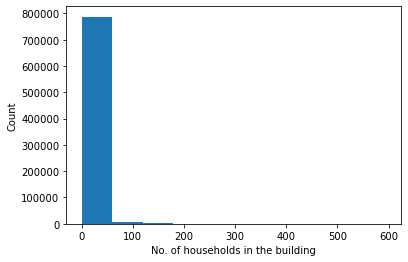

In [27]:
# plot variable distribution
plt.hist(azdias['ANZ_HAUSHALTE_AKTIV'].dropna().values)
plt.xlabel("No. of households in the building")
plt.ylabel("Count")
plt.show()

There are clearly outliers. I am gonna use the 1.5IQR approach.

In [28]:
# calculate some statistics robust to outliers
print("Median: {:.2f}".format(
    azdias['ANZ_HAUSHALTE_AKTIV'].dropna().median()))

q75, q25 = np.percentile(azdias['ANZ_HAUSHALTE_AKTIV'].dropna().values, [75 ,25])
print("First quartile: {:.2f}".format(q25))
print("Third quartile: {:.2f}".format(q75))
print("Interquantile range (IQR): {:.2f}".format(
q75 - q25))

Median: 4.00
First quartile: 1.00
Third quartile: 9.00
Interquantile range (IQR): 8.00


I will drop values larger than 1.5 * IQR = 1.5 * 8 = 12 > 10. I will drop values larger than 10.

#### 4.2 `ANZ_PERSONEN` rare values

Similar to above.

In [29]:
# display values
azdias['ANZ_PERSONEN'].value_counts().sort_index()

0.0      34103
1.0     423383
2.0     195470
3.0      94905
4.0      47126
5.0      15503
6.0       4842
7.0       1525
8.0        523
9.0        180
10.0        67
11.0        38
12.0        16
13.0        11
14.0         4
15.0         3
16.0         1
17.0         1
18.0         1
20.0         3
21.0         4
22.0         2
23.0         2
29.0         1
31.0         1
35.0         1
37.0         2
38.0         2
40.0         1
45.0         1
Name: ANZ_PERSONEN, dtype: int64

According to *DIAS Attributes - Values 2017.xlsx*, `ANZ_PERSONEN` represents the number of adult persons in the household and values are numeric, typically encoded from 1-3. The maximum value in the variable is 45.0 so there must be some **outliers**.

In [30]:
# check for missing values
azdias['ANZ_PERSONEN'].isnull().any()

True

In [31]:
# Drop missing values for outliers study only

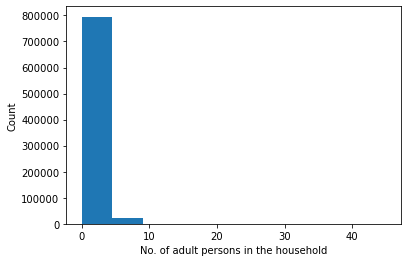

In [32]:
# plot variable distribution
plt.hist(azdias['ANZ_PERSONEN'].dropna().values)
plt.xlabel("No. of adult persons in the household")
plt.ylabel("Count")
plt.show()

In [33]:
# calculate some statistics robust to outliers
print("Median: {:.2f}".format(
    azdias['ANZ_PERSONEN'].dropna().median()))

q75, q25 = np.percentile(azdias['ANZ_PERSONEN'].dropna().values, [75 ,25])
print("First quartile: {:.2f}".format(q25))
print("Third quartile: {:.2f}".format(q75))
print("Interquantile range (IQR): {:.2f}".format(
q75 - q25))

Median: 1.00
First quartile: 1.00
Third quartile: 2.00
Interquantile range (IQR): 1.00


I will drop values larger than 3.

______

### 5. Unknown and missing values

I created a function in the module `data_preprocessing.py` called `map_unknowns()` that maps these unknown values identified during data exploration to numpy NaN's.

In [34]:
def map_unknowns(attributes, df):
    """It maps unknown values identified during data exploration to NaN's.
    Parameters
    __________
    :param attributes: Attributes pandas DataFrame.
    :param df: df: AZDIAS or CUSTOMERS Pandas DataFrame
    __________
    :return: mapped_df: AZDIAS or CUSTOMERS Pandas DataFrame with unknown values mapped to NaN's
    """
    # create a dict with original dtypes for each column
    original_dtypes = dict()
    for col in df.columns:
        original_dtypes[col] = str(df[col].dtype)

    # convert all columns to object type
    df.astype(dtype='str')
    # loop through all attributes
    for attribute in attributes.index:
        # for each attribute, retrieve a list with unknown values
        unknowns_list = attributes['Unknown'].loc[attribute].strip('][').split(', ')[0].split(',')
        # if there are unknown values, map them to NaN's
        if unknowns_list != ['']:
            if attribute in ['CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'CAMEO_INTL_2015']:
                df.loc[df[attribute].isin(['X','XX', '-1']), attribute] = np.nan
            else:
                df.loc[df[attribute].isin(unknowns_list), attribute] = np.nan

    # transform columns to original dtypes
    df.astype(original_dtypes, errors='ignore')

    mapped_df = df

    return mapped_df

### 5.1. Missing values AZDIAS dataframe


In [35]:
mapped_azdias = map_unknowns(attributes=attributes, df=azdias)

In [36]:
mapped_azdias['CAMEO_INTL_2015'].value_counts()

51      77576
51.0    56118
41      53459
24      52882
41.0    38877
24.0    38276
14      36524
43      32730
14.0    26360
54      26207
43.0    23942
25      22837
54.0    19184
22      19173
25.0    16791
23      15653
13      15272
45      15206
22.0    13982
55      13842
52      11836
23.0    11097
13.0    11064
31      11041
45.0    10926
34      10737
55.0    10113
15       9832
52.0     8706
44       8543
31.0     7983
34.0     7787
12       7645
15.0     7142
44.0     6277
35       6090
32       6067
33       5833
12.0     5604
32.0     4287
35.0     4266
33.0     4102
Name: CAMEO_INTL_2015, dtype: int64

In [37]:
azdias['CAMEO_INTL_2015'].value_counts()

51      77576
51.0    56118
41      53459
24      52882
41.0    38877
24.0    38276
14      36524
43      32730
14.0    26360
54      26207
43.0    23942
25      22837
54.0    19184
22      19173
25.0    16791
23      15653
13      15272
45      15206
22.0    13982
55      13842
52      11836
23.0    11097
13.0    11064
31      11041
45.0    10926
34      10737
55.0    10113
15       9832
52.0     8706
44       8543
31.0     7983
34.0     7787
12       7645
15.0     7142
44.0     6277
35       6090
32       6067
33       5833
12.0     5604
32.0     4287
35.0     4266
33.0     4102
Name: CAMEO_INTL_2015, dtype: int64

In [38]:
attributes

,Type,Unknown
AGER_TYP,categorical,"[-1,0]"
AKT_DAT_KL,ordinal,[]
ALTERSKATEGORIE_FEIN,ordinal,[0]
ALTERSKATEGORIE_GROB,ordinal,[0]
ALTER_HH,ordinal,[0]
...,...,...
VK_ZG11,categorical,[]
WOHNDAUER_2008,ordinal,"[-1,0]"
WOHNLAGE,ordinal,"[-1,0]"
W_KEIT_KIND_HH,ordinal,"[-1,0]"


In [39]:
mapped_azdias.head(5)

,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0,910215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2.0
1,1,910220,NaN,9.0,NaN,NaN,NaN,NaN,NaN,21.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5.0,2.0,1.0
2,2,910225,NaN,9.0,17.0,NaN,NaN,NaN,NaN,17.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5.0,2.0,3.0
3,3,910226,2.0,1.0,13.0,NaN,NaN,NaN,NaN,13.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3.0,2.0,4.0
4,4,910241,NaN,1.0,20.0,NaN,NaN,NaN,NaN,14.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4.0,1.0,3.0


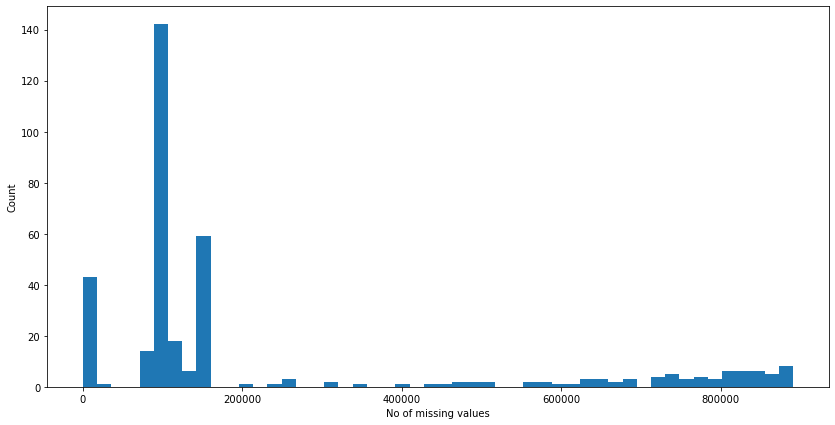

In [40]:
# plot distribution of missing value per column
mv_per_col = mapped_azdias.isnull().sum()
plt.figure(figsize=(14,7))
plt.xlabel("No of missing values")
plt.ylabel("Count")
plt.hist(mv_per_col, bins=50)
plt.show();

The majority of the attributes have less than 200000 missed values, which is about 22% of missing values per attribute.

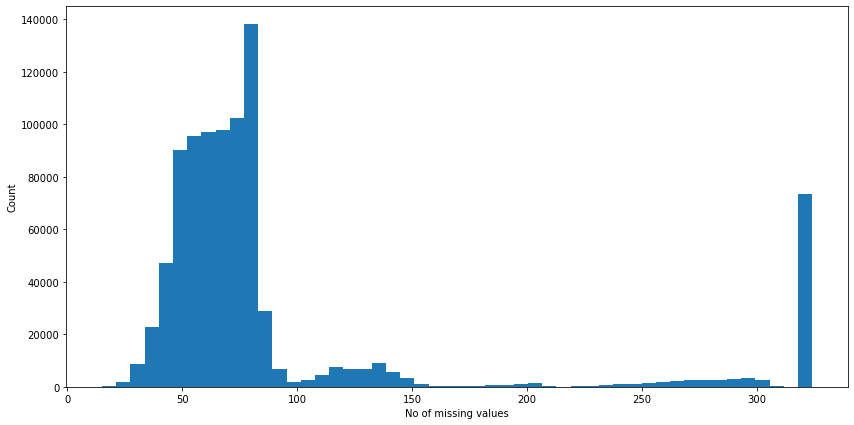

In [41]:
# plot distribution of missing value per row
mv_per_row = mapped_azdias.isnull().sum(axis=1)
plt.figure(figsize=(14,7))
plt.xlabel("No of missing values")
plt.ylabel("Count")
plt.hist(mv_per_row, bins=50)
plt.show();

The majority of the rows have less than 100 attributes with a missed value. This is about 27% of missing values per row.

`check_mv_prop( )` in the data_preprocessing module checks the proportion of missing values for each col and prints which cols have more than p% missing values.

In [42]:
def check_mv_prop(df, p, toDrop=True):
    """It checks the proportion of missing values for each col and prints which cols have more than p% missing values.
    INPUT:
    df: Pandas dataframe.
    p: float. Missing values proportion threshold.
    toDrop: Boolean. If true, condition is propotion of mv > p. condition is propotion of mv < p otherwise.

    OUTPUT:
    toDrop_lst: list of columns be dropped if toDrop = True.
    toImpute_lst: list of columns to be imputed if toImpute_lst = True.
    """
    mvs = df.isnull().sum()
    if toDrop:
        toDrop_lst = []
        for col in df.columns:
            if mvs.loc[col] / df.shape[0] > p:
                print("{:.2f}% of {} are missing values".format((df.isnull().sum().loc[col] / df.shape[0]) * 100, col))
                toDrop_lst.append(col)
        return toDrop_lst
    else:
        toImpute_lst = []
        for col in df.columns:
            if mvs.loc[col] / df.shape[0] <= p:
                print("{:.2f}% of {} are missing values".format((df.isnull().sum().loc[col] / df.shape[0]) * 100, col))
                toImpute_lst.append(col)
        return toImpute_lst

In [43]:
# find features with more than 60% of mv
azdias_toDrop = check_mv_prop(mapped_azdias, 0.6)

76.96% of AGER_TYP are missing values
90.90% of ALTER_KIND1 are missing values
96.69% of ALTER_KIND2 are missing values
99.31% of ALTER_KIND3 are missing values
99.86% of ALTER_KIND4 are missing values
93.33% of D19_BANKEN_ANZ_12 are missing values
89.10% of D19_BANKEN_ANZ_24 are missing values
76.11% of D19_BANKEN_DATUM are missing values
81.78% of D19_BANKEN_DIREKT are missing values
88.12% of D19_BANKEN_GROSS are missing values
98.15% of D19_BANKEN_LOKAL are missing values
97.79% of D19_BANKEN_OFFLINE_DATUM are missing values
81.57% of D19_BANKEN_ONLINE_DATUM are missing values
94.92% of D19_BANKEN_ONLINE_QUOTE_12 are missing values
92.21% of D19_BANKEN_REST are missing values
90.81% of D19_BEKLEIDUNG_GEH are missing values
77.70% of D19_BEKLEIDUNG_REST are missing values
91.24% of D19_BILDUNG are missing values
95.83% of D19_BIO_OEKO are missing values
69.88% of D19_BUCH_CD are missing values
96.23% of D19_DIGIT_SERV are missing values
85.39% of D19_DROGERIEARTIKEL are missing valu

All of the columns above will not be considered for analysis because the proportion of missing values is significantly large.

In [44]:
# check features with mv that will be imputed with the mode
azdias_toImpute = check_mv_prop(mapped_azdias, 0.6, toDrop=False)

0.00% of Unnamed: 0 are missing values
0.00% of LNR are missing values
8.25% of AKT_DAT_KL are missing values
34.81% of ALTER_HH are missing values
34.13% of ALTERSKATEGORIE_FEIN are missing values
10.45% of ANZ_HAUSHALTE_AKTIV are missing values
10.88% of ANZ_HH_TITEL are missing values
8.25% of ANZ_KINDER are missing values
12.07% of ANZ_PERSONEN are missing values
10.45% of ANZ_STATISTISCHE_HAUSHALTE are missing values
8.25% of ANZ_TITEL are missing values
10.91% of ARBEIT are missing values
10.52% of BALLRAUM are missing values
11.15% of CAMEO_DEU_2015 are missing values
11.15% of CAMEO_DEUG_2015 are missing values
11.15% of CAMEO_INTL_2015 are missing values
0.54% of CJT_GESAMTTYP are missing values
0.54% of CJT_KATALOGNUTZER are missing values
0.54% of CJT_TYP_1 are missing values
0.54% of CJT_TYP_2 are missing values
0.54% of CJT_TYP_3 are missing values
0.54% of CJT_TYP_4 are missing values
0.54% of CJT_TYP_5 are missing values
0.54% of CJT_TYP_6 are missing values
56.70% of D1

11.87% of KBA13_KRSSEG_OBER are missing values
11.87% of KBA13_KRSSEG_VAN are missing values
11.87% of KBA13_KRSZUL_NEU are missing values
11.87% of KBA13_KW_0_60 are missing values
11.87% of KBA13_KW_110 are missing values
11.87% of KBA13_KW_120 are missing values
11.87% of KBA13_KW_121 are missing values
11.87% of KBA13_KW_30 are missing values
11.87% of KBA13_KW_40 are missing values
11.87% of KBA13_KW_50 are missing values
11.87% of KBA13_KW_60 are missing values
11.87% of KBA13_KW_61_120 are missing values
11.87% of KBA13_KW_70 are missing values
11.87% of KBA13_KW_80 are missing values
11.87% of KBA13_KW_90 are missing values
11.87% of KBA13_MAZDA are missing values
11.87% of KBA13_MERCEDES are missing values
11.87% of KBA13_MOTOR are missing values
11.87% of KBA13_NISSAN are missing values
11.87% of KBA13_OPEL are missing values
11.87% of KBA13_PEUGEOT are missing values
11.87% of KBA13_RENAULT are missing values
11.87% of KBA13_SEG_GELAENDEWAGEN are missing values
11.87% of KBA

As a first approach, I am going to imput them with the **mode** because all the features are categorical indicating some kind of classification. A large number of them are ordinal variable already encoded.

### 5.2. Missing values CUSTOMERS dataframe

In [45]:
mapped_customers = map_unknowns(attributes=attributes, df=customers)

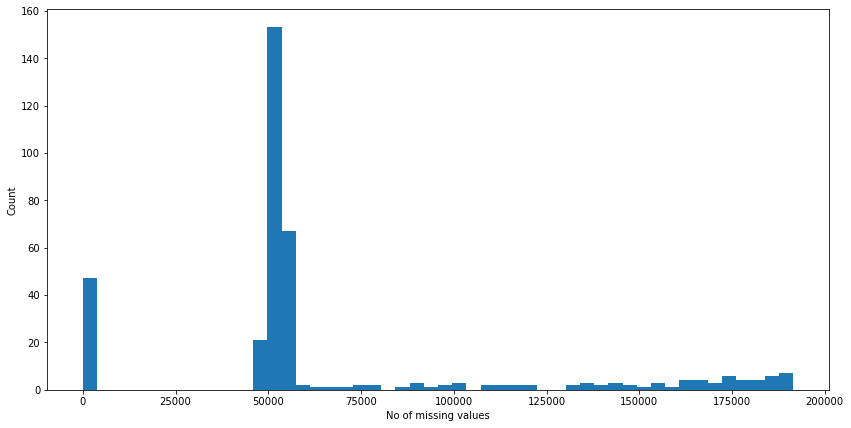

In [46]:
# plot distribution of missing value per column
mv_per_col = mapped_customers.isnull().sum()
plt.figure(figsize=(14,7))
plt.xlabel("No of missing values")
plt.ylabel("Count")
plt.hist(mv_per_col, bins=50)
plt.show();

Unlinke in AZDIAS dataframe, all the columns have less than 200000.

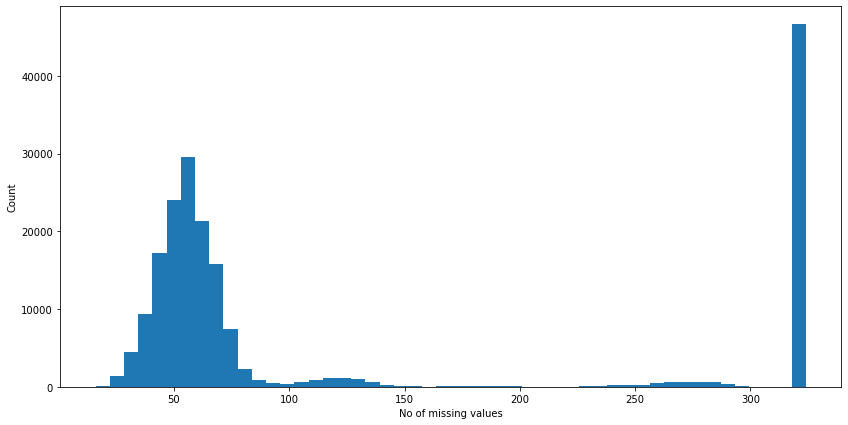

In [47]:
# plot distribution of missing value per row
mv_per_row = mapped_customers.isnull().sum(axis=1)
plt.figure(figsize=(14,7))
plt.xlabel("No of missing values")
plt.ylabel("Count")
plt.hist(mv_per_row, bins=50)
plt.show();

The majority of rows have less than 100 missed values. Pretty similar to the distribution of missing values per row of the AZDIAS dataframe.

In [48]:
# find features with more than 60% of mv
customers_toDrop = check_mv_prop(mapped_customers, 0.6)

93.86% of ALTER_KIND1 are missing values
97.34% of ALTER_KIND2 are missing values
99.33% of ALTER_KIND3 are missing values
99.88% of ALTER_KIND4 are missing values
94.00% of D19_BANKEN_ANZ_12 are missing values
90.63% of D19_BANKEN_ANZ_24 are missing values
79.71% of D19_BANKEN_DATUM are missing values
86.99% of D19_BANKEN_DIREKT are missing values
91.34% of D19_BANKEN_GROSS are missing values
97.75% of D19_BANKEN_LOKAL are missing values
96.11% of D19_BANKEN_OFFLINE_DATUM are missing values
87.44% of D19_BANKEN_ONLINE_DATUM are missing values
96.46% of D19_BANKEN_ONLINE_QUOTE_12 are missing values
91.96% of D19_BANKEN_REST are missing values
80.48% of D19_BEKLEIDUNG_GEH are missing values
71.93% of D19_BEKLEIDUNG_REST are missing values
81.27% of D19_BILDUNG are missing values
91.07% of D19_BIO_OEKO are missing values
95.77% of D19_DIGIT_SERV are missing values
83.92% of D19_DROGERIEARTIKEL are missing values
90.22% of D19_ENERGIE are missing values
86.80% of D19_FREIZEIT are missing 

In [49]:
# check features with mv that will be imputed with the mode
customers_toImpute = check_mv_prop(mapped_customers, 0.6, toDrop=False)

0.00% of Unnamed: 0 are missing values
0.00% of LNR are missing values
50.48% of AGER_TYP are missing values
24.31% of AKT_DAT_KL are missing values
35.87% of ALTER_HH are missing values
32.80% of ALTERSKATEGORIE_FEIN are missing values
26.05% of ANZ_HAUSHALTE_AKTIV are missing values
27.19% of ANZ_HH_TITEL are missing values
24.31% of ANZ_KINDER are missing values
28.04% of ANZ_PERSONEN are missing values
26.05% of ANZ_STATISTISCHE_HAUSHALTE are missing values
24.31% of ANZ_TITEL are missing values
26.34% of ARBEIT are missing values
26.07% of BALLRAUM are missing values
26.38% of CAMEO_DEU_2015 are missing values
26.38% of CAMEO_DEUG_2015 are missing values
26.38% of CAMEO_INTL_2015 are missing values
1.68% of CJT_GESAMTTYP are missing values
1.68% of CJT_KATALOGNUTZER are missing values
1.68% of CJT_TYP_1 are missing values
1.68% of CJT_TYP_2 are missing values
1.68% of CJT_TYP_3 are missing values
1.68% of CJT_TYP_4 are missing values
1.68% of CJT_TYP_5 are missing values
1.68% of 

26.76% of KBA13_KMH_211 are missing values
26.76% of KBA13_KMH_250 are missing values
26.76% of KBA13_KMH_251 are missing values
26.76% of KBA13_KRSAQUOT are missing values
26.76% of KBA13_KRSHERST_AUDI_VW are missing values
26.76% of KBA13_KRSHERST_BMW_BENZ are missing values
26.76% of KBA13_KRSHERST_FORD_OPEL are missing values
26.76% of KBA13_KRSSEG_KLEIN are missing values
26.76% of KBA13_KRSSEG_OBER are missing values
26.76% of KBA13_KRSSEG_VAN are missing values
26.76% of KBA13_KRSZUL_NEU are missing values
26.76% of KBA13_KW_0_60 are missing values
26.76% of KBA13_KW_110 are missing values
26.76% of KBA13_KW_120 are missing values
26.76% of KBA13_KW_121 are missing values
26.76% of KBA13_KW_30 are missing values
26.76% of KBA13_KW_40 are missing values
26.76% of KBA13_KW_50 are missing values
26.76% of KBA13_KW_60 are missing values
26.76% of KBA13_KW_61_120 are missing values
26.76% of KBA13_KW_70 are missing values
26.76% of KBA13_KW_80 are missing values
26.76% of KBA13_KW_90

### 5.3. Columns to be dropped from both dataframes

As we are going to compare our customers base with the general population of Germany, it does make sense to drop the same variables.

In [50]:
len(azdias_toDrop) > len(customers_toDrop)

True

In [51]:
len(azdias_toDrop)

67

In [52]:
len(customers_toDrop)

59

In [53]:
azdias_toDrop.extend(customers_toDrop)

In [54]:
len(list(set(azdias_toDrop)))

69

In [55]:
# put lists together and find unique values
toDrop = list(set(azdias_toDrop))

`ANZ_HAUSHALTE_AKTIV` and `ANZ_PERSONEN` have some outliers. Check first if they will be dropped due to amount of missing values to avoid unnecessary work.

In [347]:
['ANZ_HAUSHALTE_AKTIV', 'ANZ_PERSONEN'] in (toDrop)

False

I will remove the outliers in these variables as they will be imputed.

### 5.4. Rows to be dropped


#### 5.4.1. AZDIAS

I am going to drop individuals with more than 150 missed values. See distribution of missing values per row of mapped AZDIAS.

In [273]:
# Find individuals with more than 150 missed values
list(mapped_azdias.isnull().sum(axis=1).loc[mapped_azdias.isnull().sum(axis=1) > 150].index)

[0,
 11,
 14,
 15,
 17,
 20,
 23,
 24,
 26,
 30,
 35,
 46,
 48,
 53,
 54,
 61,
 62,
 69,
 73,
 75,
 76,
 81,
 83,
 90,
 97,
 99,
 103,
 106,
 108,
 109,
 112,
 133,
 137,
 138,
 142,
 143,
 144,
 153,
 154,
 158,
 163,
 165,
 168,
 173,
 175,
 176,
 178,
 179,
 199,
 205,
 209,
 210,
 227,
 228,
 229,
 230,
 233,
 236,
 237,
 239,
 244,
 248,
 250,
 286,
 288,
 324,
 336,
 339,
 340,
 342,
 347,
 351,
 353,
 378,
 388,
 389,
 399,
 409,
 410,
 411,
 414,
 415,
 430,
 437,
 439,
 476,
 497,
 509,
 523,
 524,
 527,
 529,
 532,
 533,
 542,
 548,
 557,
 564,
 565,
 567,
 569,
 573,
 578,
 579,
 581,
 582,
 583,
 584,
 585,
 588,
 589,
 590,
 591,
 595,
 598,
 599,
 602,
 604,
 606,
 613,
 615,
 616,
 618,
 620,
 621,
 624,
 626,
 632,
 639,
 649,
 658,
 668,
 676,
 681,
 693,
 715,
 721,
 741,
 744,
 745,
 746,
 754,
 759,
 769,
 781,
 783,
 784,
 786,
 791,
 792,
 794,
 796,
 800,
 802,
 804,
 805,
 806,
 807,
 812,
 813,
 814,
 816,
 832,
 873,
 874,
 877,
 879,
 883,
 884,
 888,
 902,
 

#### 5.4.2. CUSTOMERS

I am going to drop individuals with more than 150 missed values. See distribution of missing values per row of mapped CUSTOMERS.

In [267]:
mapped_customers.isnull().sum(axis=1).loc[mapped_customers.isnull().sum(axis=1) > 150].index

Int64Index([     1,     10,     36,     37,     38,     39,     40,     43,
                44,     46,
            ...
            191451, 191452, 191459, 191467, 191477, 191481, 191553, 191565,
            191575, 191597],
           dtype='int64', length=51339)

### 6. Encoding

As I already know, CUSTOMER has 3 columns more: `CUSTOMER_GROUP`, `ONLINE_PURCHASE`, and `PRODUCT_GROUP`.

In [219]:
mapped_customers[['CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP']]

,CUSTOMER_GROUP,ONLINE_PURCHASE,PRODUCT_GROUP
0,MULTI_BUYER,0,COSMETIC_AND_FOOD
1,SINGLE_BUYER,0,FOOD
2,MULTI_BUYER,0,COSMETIC_AND_FOOD
3,MULTI_BUYER,0,COSMETIC
4,MULTI_BUYER,0,FOOD
...,...,...,...
191647,MULTI_BUYER,0,COSMETIC_AND_FOOD
191648,SINGLE_BUYER,0,COSMETIC
191649,MULTI_BUYER,0,COSMETIC_AND_FOOD
191650,SINGLE_BUYER,0,FOOD


I want to compare the customer group with the population of Germany. This features are specific of the CUSTOMERS dataframe so **I will drop them.**

**Data types**

In [268]:
mapped_customers.describe()

,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,191652.000000,191652.000000,94914.000000,145056.000000,122905.000000,11766.000000,5100.000000,1275.000000,236.000000,128791.000000,...,143781.000000,143781.000000,143781.000000,134715.000000,145056.000000,140618.000000,191652.000000,191652.000000,191652.000000,191652.000000
mean,95825.500000,95826.500000,1.665761,1.747525,13.397966,12.337243,13.672353,14.647059,15.377119,11.215520,...,4.374417,4.564769,3.168868,4.251204,8.646371,3.752443,2.576806,0.090247,1.376432,3.060907
std,55325.311233,55325.311233,0.636370,1.966334,4.365868,4.006050,3.243335,2.753787,2.307653,2.940345,...,2.924355,2.887035,2.233516,1.889949,1.154001,2.077468,1.168486,0.286536,0.484492,1.086254
min,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,5.000000,8.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,47912.750000,47913.750000,1.000000,1.000000,10.000000,9.000000,11.000000,13.000000,14.000000,9.000000,...,2.000000,2.000000,1.000000,2.000000,9.000000,2.000000,1.000000,0.000000,1.000000,3.000000
50%,95825.500000,95826.500000,2.000000,1.000000,13.000000,13.000000,14.000000,15.000000,16.000000,11.000000,...,4.000000,4.000000,3.000000,5.000000,9.000000,3.000000,3.000000,0.000000,1.000000,3.000000
75%,143738.250000,143739.250000,2.000000,1.000000,17.000000,16.000000,16.000000,17.000000,17.000000,13.000000,...,7.000000,7.000000,4.000000,6.000000,9.000000,5.000000,3.000000,0.000000,2.000000,4.000000
max,191651.000000,191652.000000,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,...,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,1.000000,2.000000,9.000000


Similar to AZDIAS, 360 + 1 (`ONLINE_PURCHASE`) features with numerical data.
Let's check that the cols with categorical data are the same as in AZDIAS df.

In [37]:
customers.describe(exclude=np.number)

,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ,PRODUCT_GROUP,CUSTOMER_GROUP
count,141224,141224,141224,143955,141725,141725,191652,191652
unique,45,19,43,35,3034,2,3,2
top,2D,2,14,D19_UNBEKANNT,1992-02-10 00:00:00,W,COSMETIC_AND_FOOD,MULTI_BUYER
freq,11208,17574,14708,31910,64744,130382,100860,132238


In [38]:
customers_cat = customers[['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015',
                         'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ',
                          'PRODUCT_GROUP', 'CUSTOMER_GROUP']]
customers_cat.head(10)

,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ,PRODUCT_GROUP,CUSTOMER_GROUP
0,1A,1.0,13.0,D19_UNBEKANNT,1992-02-12 00:00:00,W,COSMETIC_AND_FOOD,MULTI_BUYER
1,NaN,NaN,NaN,D19_BANKEN_GROSS,NaN,NaN,FOOD,SINGLE_BUYER
2,5D,5.0,34.0,D19_UNBEKANNT,1992-02-10 00:00:00,W,COSMETIC_AND_FOOD,MULTI_BUYER
3,4C,4.0,24.0,D19_NAHRUNGSERGAENZUNG,1992-02-10 00:00:00,W,COSMETIC,MULTI_BUYER
4,7B,7.0,41.0,D19_SCHUHE,1992-02-12 00:00:00,W,FOOD,MULTI_BUYER
5,5D,5.0,34.0,D19_BUCH_CD,1992-02-10 00:00:00,W,COSMETIC_AND_FOOD,MULTI_BUYER
6,3B,3.0,23.0,D19_DROGERIEARTIKEL,1992-02-10 00:00:00,W,COSMETIC_AND_FOOD,MULTI_BUYER
7,1D,1.0,15.0,D19_SONSTIGE,1992-02-10 00:00:00,W,FOOD,SINGLE_BUYER
8,9E,9.0,55.0,D19_SONSTIGE,2004-10-14 00:00:00,W,COSMETIC,MULTI_BUYER
9,1D,1.0,15.0,D19_BUCH_CD,1997-07-14 00:00:00,W,COSMETIC,MULTI_BUYER


**CAMEO_ features** - Same approach as for AZDIAS.

`D19_LETZTER_KAUF_BRANCHE`, `EINGEFUEGT_AM` and `OST_WEST_KZ` will be **dropped** as for AZDIAS.

### 7. Data Preprocessing

All the data preprocessing identified here have been implemented in functions in a python script called `data_preprocessing.py`.

Run python data_preprocessing.py to save preprocessed dataframes in the data folder.